actual download:
https://www.kaggle.com/datasets/jackdaoud/marketing-data?resource=download   



In [417]:
import pandas as pd

In [418]:
#df = pd.read_csv('/Users/pbarriga812/Documents/Data projects/Superstore Sales/superstore_final_dataset (1).csv')

path = "data"
# Try reading the CSV file with a different encoding, like 'latin-1' or 'iso-8859-1'
original_cl = pd.read_csv(path)#, encoding='latin-1')  # or encoding='iso-8859-1' , parse_dates = True, infer_datetime_format = True

The data set ifood_df.csv consists of 2206 customers of XYZ company with data on:

Customer profiles
Product preferences
Campaign successes/failures
Channel performance

In [419]:
df = original_cl.copy()

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [421]:
df.duplicated().value_counts()

False    2021
True      184
Name: count, dtype: int64

In [422]:
df.drop_duplicates(inplace=True) #doping duplicates 184 rows

In [423]:
df.isnull().values.any()

False

After checking for null values, duplicates, or NAs ;
I created a "Mnttotal" column for all the Mnt

In [424]:
df['MntTotal']= df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

let's check for Marital Status and total spent

let's create a new column for all marital status 
- 'marital_Divorced' - 0
- 'marital_Married' - 1
- 'marital_Single'- 0
- 'marital_Together'- 1
- 'marital_Widow'- 0

Also let's create a column for EDUCATION 
- 'education_2n Cycle'
- 'education_Basic'
- 'education_Graduation'
- 'education_Master'
- 'education_PhD'

In [425]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [426]:
# List of marital status columns
marital_columns = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow'] #i'll use this for later corr

# Create a new column based on the values
new_marital_status = []

for index, row in df.iterrows():
    for col in marital_columns:
        if row[col] == 1:  # If the column value is 1, extract the marital status
            new_marital_status.append(col.replace("marital_", ""))  # Remove "marital_" prefix
            break  # Stop checking further columns for this row

# Assign new column to DataFrame
df["Marital_Status"] = new_marital_status



In [427]:
df['Marital_Status'].value_counts()

Marital_Status
Married     785
Together    509
Single      443
Divorced    214
Widow        70
Name: count, dtype: int64

In [428]:
# Create a new column based on the given conditions
df['Marital_Status_Binary'] = df.apply(lambda row: 1 if row['marital_Married'] == 1 or row['marital_Together'] == 1 else 0, axis=1)

# Display the updated DataFrame
df[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'Marital_Status_Binary']].head()

,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,Marital_Status_Binary
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,0,1,0,1
3,0,0,0,1,0,1
4,0,1,0,0,0,1


In [429]:
df['Marital_Status_Binary'].value_counts()

Marital_Status_Binary
1    1294
0     727
Name: count, dtype: int64

In [430]:
# List of education status columns
education_columns = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD'] #for corr later

# Create a new column based on the values
new_education_status = []

for index, row in df.iterrows():
    for col in education_columns:
        if row[col] == 1:  # If the column value is 1, extract the marital status
            new_education_status.append(col.replace("education_", ""))  # Remove "marital_" prefix
            break  # Stop checking further columns for this row

# Assign new column to DataFrame
df["Education_Status"] = new_education_status



In [431]:
df['Education_Status'].value_counts()

Education_Status
Graduation    1015
PhD            439
Master         335
2n Cycle       183
Basic           49
Name: count, dtype: int64

now that we have the total spent, marital status, education status, we should check if kids are present in the household. 

In [432]:
df['Kidhome'].value_counts()

Kidhome
0    1166
1     814
2      41
Name: count, dtype: int64

In [433]:
df['Teenhome'].value_counts()

Teenhome
0    1040
1     932
2      49
Name: count, dtype: int64

In [434]:
# Create a new column based on the given conditions
df['Children_Binary'] = df.apply(lambda row: 1 if row['Kidhome'] > 0 or row['Teenhome'] > 0 else 0, axis=1)

# Display the updated DataFrame
df[['Kidhome', 'Teenhome', 'Children_Binary']].head()

,Kidhome,Teenhome,Children_Binary
0,0,0,0
1,1,1,1
2,0,0,0
3,1,0,1
4,1,0,1


Next we should see the correlations (income, MntTotal, Marital_Status, children, education?)

In [435]:
# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=['Marital_Status', 'Education_Status'])

# Calculate the correlation matrix
correlation_matrix = df_encoded[['Income', 'MntTotal', 'Age'] + [col for col in df_encoded.columns if 'Marital_Status_' in col or 'Education_Status_' in col]].corr()

# Extract the correlation of 'Income' with other columns
income_correlation = correlation_matrix['Income'].sort_values(ascending=False)
print(income_correlation)

Income                         1.000000
MntTotal                       0.819310
Age                            0.216372
Education_Status_PhD           0.083590
Marital_Status_Widow           0.047589
Education_Status_Master        0.025343
Education_Status_Graduation    0.022483
Marital_Status_Divorced        0.015109
Marital_Status_Together       -0.004510
Marital_Status_Married        -0.007835
Marital_Status_Binary         -0.012037
Marital_Status_Single         -0.018309
Education_Status_2n Cycle     -0.062488
Education_Status_Basic        -0.241868
Name: Income, dtype: float64


In [436]:
# Calculate the correlation matrix for the specified columns
correlation_matrix = df[['Income', 'MntTotal', 'Kidhome', 'Teenhome', 'Age'] + marital_columns + education_columns].corr()

# Extract the correlation of 'Income' with the specified columns
income_correlation = correlation_matrix['Income'].sort_values(ascending=False)
print(income_correlation)

Income                  1.000000
MntTotal                0.819310
Age                     0.216372
education_PhD           0.083590
marital_Widow           0.047589
Teenhome                0.044418
education_Master        0.025343
education_Graduation    0.022483
marital_Divorced        0.015109
marital_Together       -0.004510
marital_Married        -0.007835
marital_Single         -0.018309
education_2n Cycle     -0.062488
education_Basic        -0.241868
Kidhome                -0.540774
Name: Income, dtype: float64


These correlations show that MntTotal is highly correlated to income and having a kid in the household has a negative correlation. 

ok and now that we know how the correlations to income looks, lets create clusters or consumer segmentation based on the same parameters for correlation

In [437]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'Marital_Status', 'Marital_Status_Binary',
       'Education_Status', 'Children_Binary'],
      dtype='object')

Steps to clustering 1) standarization 2) Perform Dimensionality Reduction with PCA 3) fit to k-means

In [438]:
consumer= df[['Income', 'MntTotal', 'Children_Binary','Marital_Status_Binary', 'Age'] + education_columns]
consumer

,Income,MntTotal,Children_Binary,Marital_Status_Binary,Age,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD
0,58138.0,1617,0,0,63,0,0,1,0,0
1,46344.0,27,1,0,66,0,0,1,0,0
2,71613.0,776,0,1,55,0,0,1,0,0
3,26646.0,53,1,1,36,0,0,1,0,0
4,58293.0,422,1,1,39,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,22,0,0,34,0,0,1,0,0
2200,61223.0,1341,1,1,53,0,0,1,0,0
2202,56981.0,1241,0,0,39,0,0,1,0,0
2203,69245.0,843,1,1,64,0,0,0,1,0


In [439]:
consumer['Age'].describe()

count    2021.000000
mean       51.117269
std        11.667616
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: Age, dtype: float64

scaling data- consumer table

In [440]:
# import module
from sklearn.preprocessing import MinMaxScaler
 
# scale features
scaler = MinMaxScaler()
model=scaler.fit(consumer)
scaled_data=model.transform(consumer)
 
# print scaled features
print(scaled_data)

[[0.50362487 0.63968254 0.         ... 1.         0.         0.        ]
 [0.39832506 0.00873016 1.         ... 1.         0.         0.        ]
 [0.62393307 0.30595238 0.         ... 1.         0.         0.        ]
 ...
 [0.49329488 0.49047619 0.         ... 1.         0.         0.        ]
 [0.60279097 0.33253968 1.         ... 0.         1.         0.        ]
 [0.45658191 0.06626984 1.         ... 0.         0.         1.        ]]


In [441]:
pca= PCA()
pca.fit(scaled_data)


PCA()

In [442]:
pca.explained_variance_ratio_

array([0.27783779, 0.19909792, 0.17687682, 0.15198704, 0.08918462,
       0.04686016, 0.03091968, 0.02157739, 0.00565859, 0.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

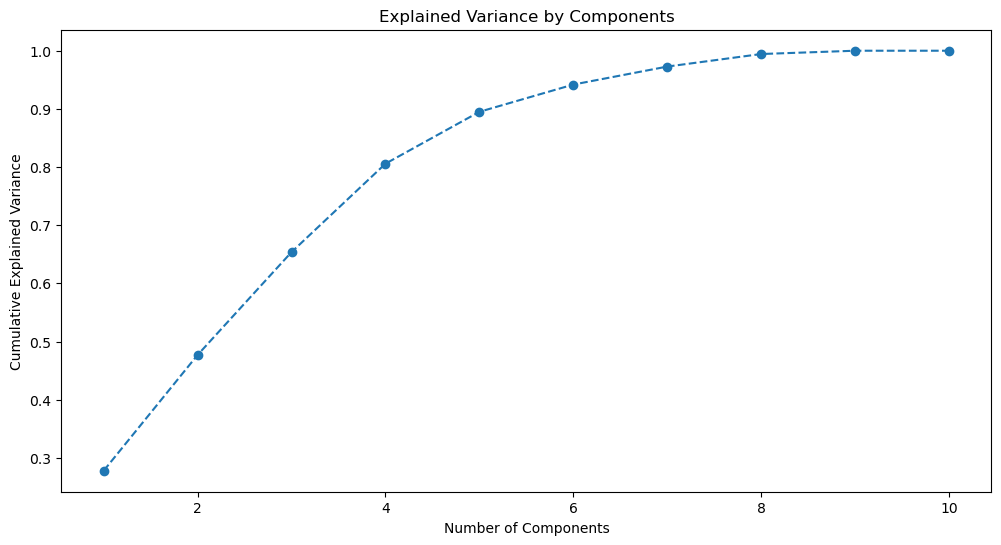

In [443]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

A rule of thumb is to preserve around 80 % of the variance. So, in this instance, decide to keep 4 components.

In [444]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=4)  # 4 number of components

# Fit and transform the scaled data
pca_result = pca.fit_transform(scaled_data)

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the PCA result
print("PCA result:\n", pca_result)

Explained variance ratio: [0.27783779 0.19909792 0.17687682 0.15198704]
PCA result:
 [[ 0.59915123 -1.01325725  0.09426757 -0.01890979]
 [ 0.57146962 -0.17969543 -0.69750504  0.00879094]
 [ 0.57457168 -0.26205207  0.75072237 -0.10296462]
 ...
 [ 0.61268581 -0.96382521  0.04881619 -0.00311344]
 [-0.5450838   0.39836367  0.20404886  0.75951094]
 [-0.76343991  0.41077092 -0.00457711 -0.6084023 ]]


runing Inertia score for table pca_results

In [445]:
from sklearn.cluster import KMeans

inertia_list = []
for K in range(2, 10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(pca_result).inertia_
    inertia_list.append(inertia)

print(inertia_list)

[1610.5282438080033, 1193.5140816807316, 757.9116226070727, 597.8989364894067, 474.9653247905412, 372.71784091960353, 313.3159655045571, 275.1733449755356]


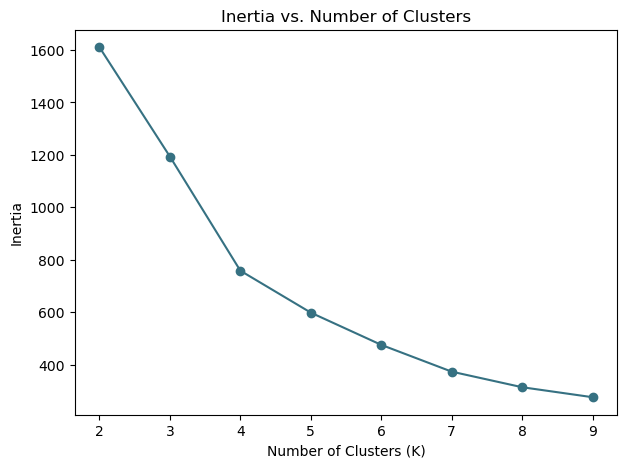

In [446]:
plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255), marker='o')
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

Inertia score sugest 4 to 6 clusters. Lets see what the Silhuette score sugest 

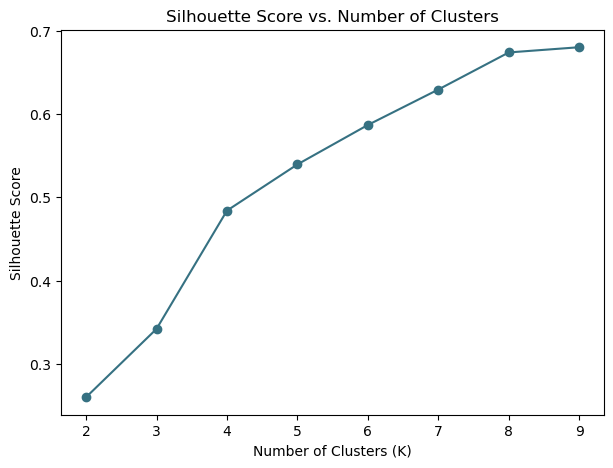

In [447]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(pca_result)
    s_avg = silhouette_score(pca_result, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255), marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

it sugest 4 clusters

In [448]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(pca_result)
#consumer['Cluster'] = model.predict(pca_result)

KMeans(n_clusters=4, random_state=42)

In [449]:
consumer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2021 entries, 0 to 2204
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 2021 non-null   float64
 1   MntTotal               2021 non-null   int64  
 2   Children_Binary        2021 non-null   int64  
 3   Marital_Status_Binary  2021 non-null   int64  
 4   Age                    2021 non-null   int64  
 5   education_2n Cycle     2021 non-null   int64  
 6   education_Basic        2021 non-null   int64  
 7   education_Graduation   2021 non-null   int64  
 8   education_Master       2021 non-null   int64  
 9   education_PhD          2021 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 173.7 KB


let's explore our clusters. PCA results need to be integrated with original consumers table. 

In [450]:
df_2 = consumer.copy()

In [451]:
# Add PCA results to the consumer DataFrame
for i in range(pca_result.shape[1]):
    df_2[f'PCA_Component_{i+1}'] = pca_result[:, i]

df_2['Cluster'] = model.predict(pca_result)
# Display the updated DataFrame
df_2.head()

,Income,MntTotal,Children_Binary,Marital_Status_Binary,Age,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,Cluster
0,58138.0,1617,0,0,63,0,0,1,0,0,0.599151,-1.013257,0.094268,-0.018910,2
1,46344.0,27,1,0,66,0,0,1,0,0,0.571470,-0.179695,-0.697505,0.008791,0
2,71613.0,776,0,1,55,0,0,1,0,0,0.574572,-0.262052,0.750722,-0.102965,2
3,26646.0,53,1,1,36,0,0,1,0,0,0.562751,0.545054,-0.011277,-0.068872,0
4,58293.0,422,1,1,39,0,0,0,0,1,-0.746643,0.391830,0.019504,-0.602679,1


In [452]:
print(df_2['Cluster'].value_counts())

Cluster
0    728
1    726
2    287
3    280
Name: count, dtype: int64


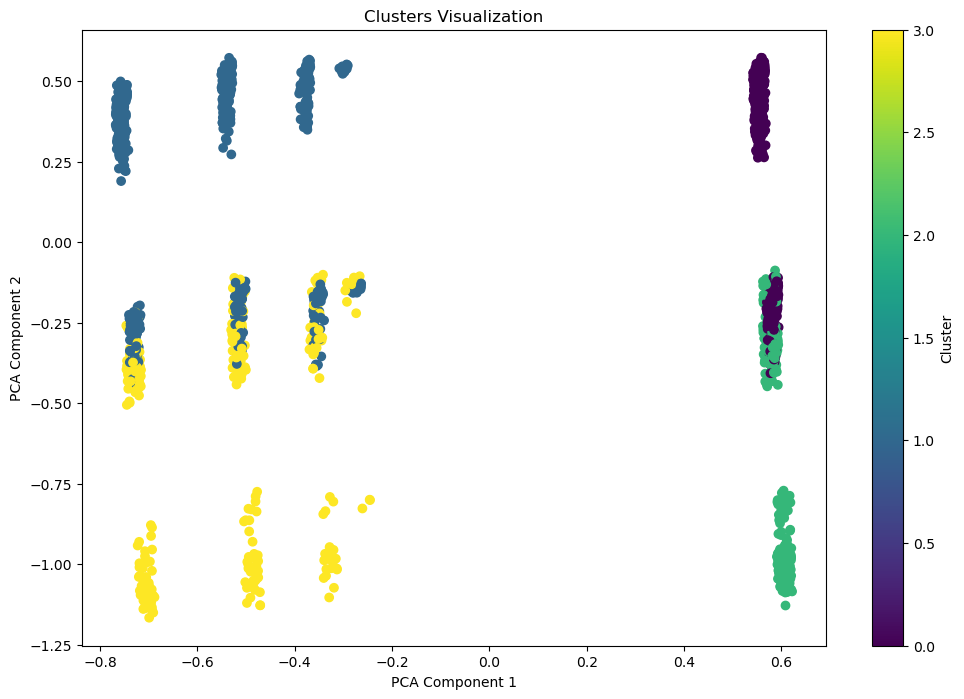

In [453]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(12, 8))
plt.scatter(df_2['PCA_Component_1'], df_2['PCA_Component_2'], c=df_2['Cluster'], cmap='viridis', marker='o')
plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

comparing Scaled_data with pca_results

In [454]:
clus_scaled = consumer.copy()

In [455]:
model_scaled = KMeans(n_clusters=5, random_state=42)
model.fit(scaled_data)
clus_scaled['Cluster'] = model.predict(scaled_data)

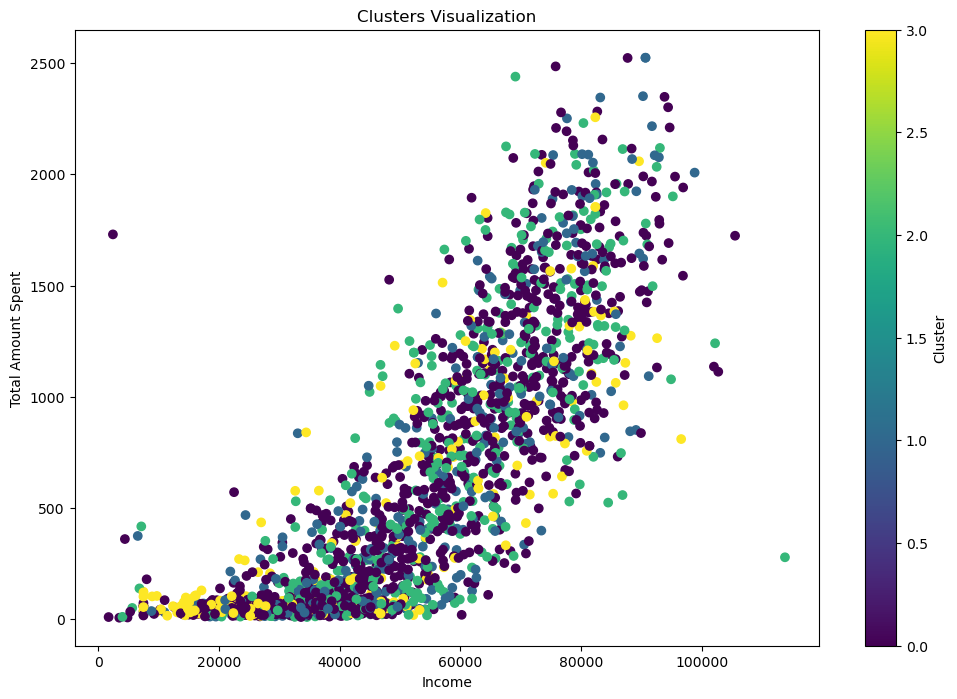

In [456]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(12, 8))
plt.scatter(clus_scaled['Income'], clus_scaled['MntTotal'], c=clus_scaled['Cluster'], cmap='viridis', marker='o')
plt.title('Clusters Visualization')
plt.xlabel('Income')
plt.ylabel('Total Amount Spent')
plt.colorbar(label='Cluster')
plt.show()

In [457]:
print(clus_scaled['Cluster'].value_counts())

Cluster
0    1015
2     439
1     335
3     232
Name: count, dtype: int64


In [458]:
clus_scaled.groupby('Cluster')[['Income', 'Age', 'MntTotal', 'Children_Binary']].mean()

,Income,Age,MntTotal,Children_Binary
Cluster,,,,
0,52150.761576,50.512315,623.998030,0.717241
1,52864.582090,53.008955,619.895522,0.722388
2,54973.211845,53.820046,663.908884,0.735763
3,41741.603448,45.918103,412.521552,0.693966


studying the clusters on table df_2 - with PCA results

In [459]:
df_2.groupby('Cluster')[['Income', 'Age', 'MntTotal', 'Children_Binary', 'Marital_Status_Binary']].mean().sort_values('Income', ascending=False)

,Income,Age,MntTotal,Children_Binary,Marital_Status_Binary
Cluster,,,,,
2,66421.738676,51.257840,1126.968641,0.0,0.578397
3,64869.021429,51.692857,1113.914286,0.0,0.603571
0,46524.703297,50.218407,425.711538,1.0,0.656593
1,45955.373278,51.741047,389.710744,1.0,0.662534


In [463]:
df_2.groupby('Cluster').mean()

,Income,MntTotal,Children_Binary,Marital_Status_Binary,Age,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4
Cluster,,,,,,,,,,,,,,
0,46524.703297,425.711538,1.0,0.656593,50.218407,0.000000,0.000000,1.0,0.000000,0.000000,0.564146,0.238890,-0.189652,-0.053504
1,45955.373278,389.710744,1.0,0.662534,51.741047,0.174931,0.046832,0.0,0.333333,0.444904,-0.586751,0.213981,-0.186219,0.054553
2,66421.738676,1126.968641,0.0,0.578397,51.257840,0.000000,0.000000,1.0,0.000000,0.000000,0.589202,-0.575711,0.472185,-0.064699
3,64869.021429,1113.914286,0.0,0.603571,51.692857,0.200000,0.053571,0.0,0.332143,0.414286,-0.549352,-0.585832,0.491944,0.063978


In [466]:
df_2.groupby('Cluster')[['Income', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].mean().sort_values('Income', ascending=False)

,Income,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD
Cluster,,,,,,
2,66421.738676,0.000000,0.000000,1.0,0.000000,0.000000
3,64869.021429,0.200000,0.053571,0.0,0.332143,0.414286
0,46524.703297,0.000000,0.000000,1.0,0.000000,0.000000
1,45955.373278,0.174931,0.046832,0.0,0.333333,0.444904


In [413]:
df_2[df_2['Cluster']== 1] 

,Income,MntTotal,Children_Binary,Marital_Status_Binary,Age,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,Cluster
4,58293.0,422,1,1,39,173,43,118,46,27,...,0,0,0,0,1,-0.746643,0.391830,0.019504,-0.602679,1
5,62513.0,716,1,1,53,520,42,98,0,42,...,0,0,0,1,0,-0.538680,0.425397,0.178656,0.767986,1
7,33454.0,169,1,1,35,76,10,56,3,1,...,0,0,0,0,1,-0.744509,0.453275,-0.042248,-0.589643,1
8,30351.0,46,1,1,46,14,0,24,3,3,...,0,0,0,0,1,-0.751392,0.464298,-0.055409,-0.591387,1
9,5648.0,49,1,1,70,28,0,6,1,1,...,0,0,0,0,1,-0.765484,0.487443,-0.083664,-0.593698,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,7500.0,53,1,1,41,2,8,11,3,8,...,1,0,0,0,0,-0.374403,0.562563,-0.016573,0.178030,1
2190,33562.0,51,1,1,57,21,12,12,0,3,...,0,0,0,1,0,-0.542325,0.528657,0.073264,0.785107,1
2191,57642.0,679,1,0,50,580,6,58,8,0,...,0,0,0,0,1,-0.725496,-0.322468,-0.674322,-0.515143,1
2203,69245.0,843,1,1,64,428,30,214,80,30,...,0,0,0,1,0,-0.545084,0.398364,0.204049,0.759511,1


For cluster 2 with no kids 57% are in a relationship and 43% are single with 

In [402]:
# Calculate the total MntTotal for each cluster
cluster_mnt_total = df_2.groupby('Cluster')['MntTotal'].sum()

# Calculate the overall total MntTotal
overall_mnt_total = df_2['MntTotal'].sum()

# Calculate the percentage of MntTotal for each cluster
cluster_mnt_percentage = (cluster_mnt_total / overall_mnt_total) * 100

# Display the percentage of MntTotal for each cluster
print(cluster_mnt_percentage)

Cluster
0    25.233841
1    23.036451
2    26.334816
3    25.394892
Name: MntTotal, dtype: float64


we can see cluster 2 is a premium cluster spending more, followed by cluster #3. however cluster 3 with 280 customers brings a similar percentage as cluster 0 with 728 customers

Now that we know Premium cluster is #2 and cluster #0 includes at least a child in the household let's see where they spend more money

In [406]:
# Ensure the columns are present in the consumer DataFrame
consumer = df[['Income', 'MntTotal', 'Children_Binary', 'Marital_Status_Binary', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'] + education_columns]

# Copy the consumer DataFrame to df_2
df_2 = consumer.copy()

# Add PCA results to the consumer DataFrame
for i in range(pca_result.shape[1]):
    df_2[f'PCA_Component_{i+1}'] = pca_result[:, i]

df_2['Cluster'] = model.predict(pca_result)

# Group by 'Cluster' and calculate the mean for the specified columns
Product_consumption = df_2.groupby('Cluster')[['MntTotal', 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean().sort_values('MntTotal', ascending=False)

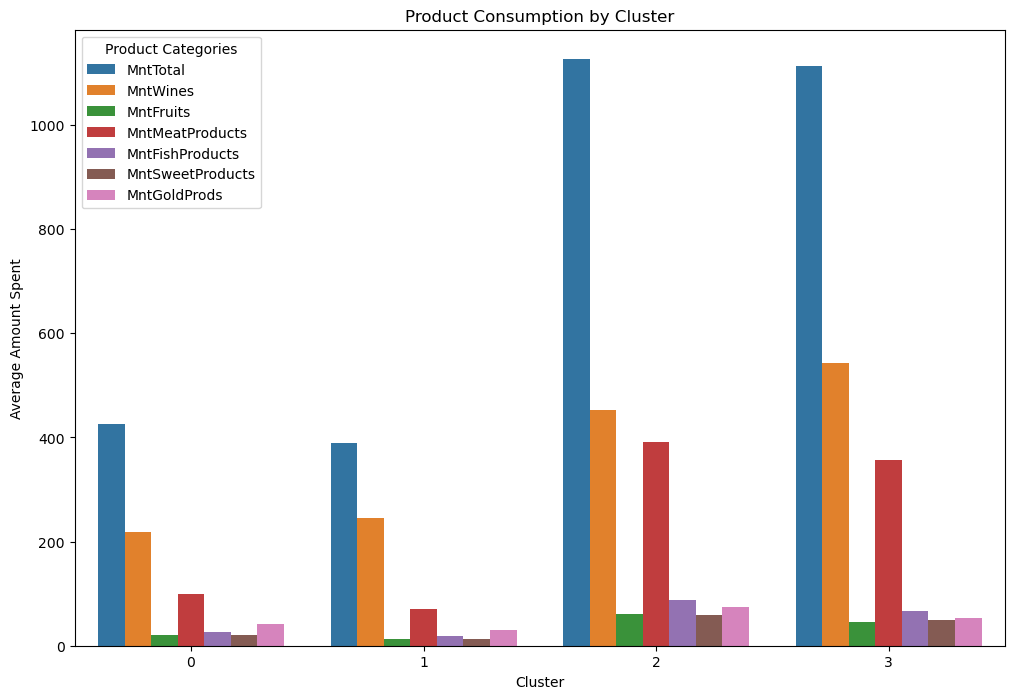

In [408]:
import seaborn as sns

import matplotlib.pyplot as plt

# Reset the index to use 'Cluster' as a column
product_consumption_reset = Product_consumption.reset_index()

# Melt the DataFrame to long format
product_consumption_melted = product_consumption_reset.melt(id_vars='Cluster', var_name='Product', value_name='Average Amount Spent')

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Cluster', y='Average Amount Spent', hue='Product', data=product_consumption_melted)
plt.title('Product Consumption by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Amount Spent')
plt.legend(title='Product Categories')
plt.show()